# Chapter 6


In this chapter, we will study methods used by financial datascientists to find the variables that are most likely to help us find the closing price of the GOLD. Next, we will see how to quantify the benefits of these methods. And we will post the strategy backtesting.


###### Summary
- Librairies
- Data Import
- Variances features Selection
- Correlation features Selection
- Other features selection
- Application
- All variable startegie
- Best variable strategie
- Resume
- Bonus: standardisation




###### Librairies

In [104]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

###### Data import

In [105]:
database = pds.read_csv("actifs.csv", index_col="Unnamed: 0", parse_dates=True)

In [106]:
dataset = database.dropna()
dataset

Open MSFT  High MSFT  Low MSFT  Close MSFT  Volume MSFT  \
2020-03-18     138.00   146.0000  135.0200      140.40   80794307.0   
2020-03-17     140.00   147.4998  135.0000      146.57   81059817.0   
2020-03-16     140.00   149.3500  135.0000      135.42   87905868.0   
2020-03-13     147.50   161.9100  140.7300      158.83   92727446.0   
2020-03-12     145.30   153.4700  138.5800      139.06   93226366.0   
...               ...        ...       ...         ...          ...   
2014-11-13      48.81    49.6450   48.7050       49.61   26210433.0   
2014-11-12      48.56    48.9200   48.5200       48.78   22722123.0   
2014-11-11      48.85    48.9300   48.6450       48.87   23445239.0   
2014-11-10      48.65    49.1500   48.5500       48.89   36370067.0   
2014-11-07      48.92    48.9200   48.2901       48.68   28000598.0   

            Open GOOG  High GOOG  Low GOOG  Close GOOG  Volume GOOG  ...  \
2020-03-18    1056.51  1106.5000   1037.28     1096.80    4220935.0  ...   
2020-03-17    1093.11  1130.8600   1056.01     1119.80    3861489.0  ...   
2020-03-16    1096.00  1152.2700   1074.44     1084.33    4252365.0  ...   
2020-03-13    1179.00  1219.7600   1117.14     1219.73    3700125.0  ...   
2020-03-12    1126.00  1193.8700   1113.30     1114.91    4226748.0  ...   
...               ...        ...       ...         ...          ...  ...   
2014-11-13     549.80   549.8000    543.48      545.38    1335719.0  ...   
2014-11-12     550.39   550.4600    545.17      547.31    1126594.0  ...   
2014-11-11     548.49   551.9399    546.30      550.29     964866.0  ...   
2014-11-10     541.46   549.5900    541.02      547.49    1131546.0  ...   
2014-11-07     546.21   546.2100    538.67      541.01    1629259.0  ...   

            Open EUROSTOCK50  High EUROSTOCK50  Low EUROSTOCK50  \
2020-03-18         2507.3301         2507.3301        2365.7000   
2020-03-17         2475.1799         2555.4099        2376.2300   
2020-03-16         2557.7100         2557.7100        2302.8401   
2020-03-13         2584.3601         2793.2700        2537.2700   
2020-03-12         2883.2500         2883.2500        2535.8899   
...                      ...               ...              ...   
2014-11-13         3059.8501         3078.1499        3026.4099   
2014-11-12         3096.2400         3099.6499        3042.7600   
2014-11-11         3096.9700         3118.4900        3090.9800   
2014-11-10         3060.9800         3094.6899        3050.3799   
2014-11-07         3106.8401         3111.4099        3043.4299   

            Close EUROSTOCK50  Volume EUROSTOCK50  Open INTEL  High INTEL  \
2020-03-18          2385.8201          98214900.0       30.24     32.4550   
2020-03-17          2530.5000         106905300.0       29.06     33.8000   
2020-03-16          2450.3701         137137000.0       30.11     32.8450   
2020-03-13          2586.0200         136547100.0       33.87     35.0077   
2020-03-12          2545.2300         167329900.0       35.29     36.0432   
...                       ...                 ...         ...         ...   
2014-11-13          3056.8000          65355100.0       18.04     18.2599   
2014-11-12          3047.3000          77774400.0       17.52     18.1100   
2014-11-11          3104.5901          65079900.0       17.23     17.6200   
2014-11-10          3094.6001          52325700.0       17.40     17.6010   
2014-11-07          3064.9199          68739300.0       17.31     17.4500   

            Low INTEL  Close INTEL  Volume INTEL  
2020-03-18     28.010        29.20      192337.0  
2020-03-17     28.790        32.40      273967.0  
2020-03-16     28.620        29.01       97928.0  
2020-03-13     31.000        33.00      126388.0  
2020-03-12     32.330        32.43      145336.0  
...               ...          ...           ...  
2014-11-13     17.910        17.94       31800.0  
2014-11-12     17.520        18.06       35700.0  
2014-11-11     17.192        17.58       20300.0  
2014-1

In [107]:
database.columns.to_list()

['Open MSFT',
 'High MSFT',
 'Low MSFT',
 'Close MSFT',
 'Volume MSFT',
 'Open GOOG',
 'High GOOG',
 'Low GOOG',
 'Close GOOG',
 'Volume GOOG',
 'Open GOLD',
 'High GOLD',
 'Low GOLD',
 'Close GOLD',
 'Volume GOLD',
 'Open SP500',
 'High SP500',
 'Low SP500',
 'Close SP500',
 'Volume SP500',
 'Open DJI30',
 'High DJI30',
 'Low DJI30',
 'Close DJI30',
 'Volume DJI30',
 'Open AAPL',
 'High AAPL',
 'Low AAPL',
 'Close AAPL',
 'Volume AAPL',
 'Open EUR/USD',
 'High EUR/USD',
 'Low EUR/USD',
 'Close EUR/USD',
 'Open USD/CAD',
 'High USD/CAD',
 'Low USD/CAD',
 'Close USD/CAD',
 'Open USD/AUD',
 'High USD/AUD',
 'Low USD/AUD',
 'Close USD/AUD',
 'Open USD/CNY',
 'High USD/CNY',
 'Low USD/CNY',
 'Close USD/CNY',
 'Open USD/GBP',
 'High USD/GBP',
 'Low USD/GBP',
 'Close USD/GBP',
 'Open AMZN',
 'High AMZN',
 'Low AMZN',
 'Close AMZN',
 'Volume AMZN',
 'Open CAC40',
 'High CAC40',
 'Low CAC40',
 'Close CAC40',
 'Volume CAC40',
 'Open DAX30',
 'High DAX30',
 'Low DAX30',
 'Close DAX30',
 'Volume 

In [108]:
listcolumns = ['Open MSFT',
 'High MSFT',
 'Low MSFT',
 'Close MSFT',
 'Volume MSFT',
 'Open GOOG',
 'High GOOG',
 'Low GOOG',
 'Close GOOG',
 'Volume GOOG',
 'Open GOLD',
 'High GOLD',
 'Low GOLD',
 'Close GOLD',
 'Volume GOLD',
 'Open SP500',
 'High SP500',
 'Low SP500',
 'Close SP500',
 'Volume SP500',
 'Open DJI30',
 'High DJI30',
 'Low DJI30',
 'Close DJI30',
 'Volume DJI30',
 'Open EUR/USD',
 'High EUR/USD',
 'Low EUR/USD',
 'Close EUR/USD',
 'Open USD/CAD',
 'High USD/CAD',
 'Low USD/CAD',
 'Close USD/CAD',
 'Open USD/AUD',
 'High USD/AUD',
 'Low USD/AUD',
 'Close USD/AUD',
 'Open USD/CNY',
 'High USD/CNY',
 'Low USD/CNY',
 'Close USD/CNY',
 'Open USD/GBP',
 'High USD/GBP',
 'Low USD/GBP',
 'Close USD/GBP',
 'Open AMZN',
 'High AMZN',
 'Low AMZN',
 'Close AMZN',
 'Volume AMZN',
 'Open CAC40',
 'High CAC40',
 'Low CAC40',
 'Close CAC40',
 'Volume CAC40',
 'Open DAX30',
 'High DAX30',
 'Low DAX30',
 'Close DAX30',
 'Open RUSSEL2000',
 'High RUSSEL2000',
 'Low RUSSEL2000',
 'Close RUSSEL2000',
 'Open EUROSTOCK50',
 'High EUROSTOCK50',
 'Low EUROSTOCK50',
 'Close EUROSTOCK50',
 'Open INTEL',
 'High INTEL',
 'Low INTEL',
 'Close INTEL',
 'Volume INTEL']
database = database[listcolumns].sort_index(axis=0, ascending=True).dropna().pct_change(1).dropna().reset_index(drop=True)

In [109]:
database

Open MSFT  High MSFT  Low MSFT  Close MSFT  Volume MSFT  Open GOOG  \
0     -0.005519   0.004702  0.005382    0.004314     0.298903  -0.008696   
1      0.004111  -0.004476  0.001957   -0.000409    -0.355370   0.012983   
2     -0.005937  -0.000204 -0.002570   -0.001842    -0.030843   0.003464   
3      0.005148   0.014820  0.003813    0.017015     0.153520  -0.001072   
4      0.019053   0.008057  0.014064   -0.000605     0.109545  -0.005675   
...         ...        ...       ...         ...          ...        ...   
1269  -0.075290  -0.026823 -0.083162   -0.094838     0.649898  -0.098984   
1270   0.015141   0.054994  0.015515    0.142169    -0.005352   0.047069   
1271  -0.050847  -0.077574 -0.040716   -0.147390    -0.051997  -0.070399   
1272   0.000000  -0.012388  0.000000    0.082336    -0.077879  -0.002637   
1273  -0.014286  -0.010168  0.000148   -0.042096    -0.003275  -0.033482   

      High GOOG  Low GOOG  Close GOOG  Volume GOOG  ...  Close RUSSEL2000  \
0      0.006188  0.004363    0.011978    -0.305484  ...          0.005327   
1      0.004276  0.009759    0.005114    -0.147303  ...          0.000331   
2     -0.002681 -0.002068   -0.005415     0.167617  ...          0.005517   
3     -0.001199 -0.003100   -0.003526     0.185626  ...         -0.009313   
4     -0.005675 -0.002447   -0.001797    -0.037229  ...         -0.001370   
...         ...       ...         ...          ...  ...               ...   
1269  -0.053205 -0.069202   -0.082688     0.618681  ...         -0.008975   
1270   0.021686  0.003449    0.094017    -0.124593  ...         -0.004163   
1271  -0.055331 -0.038223   -0.111008     0.149249  ...          0.008583   
1272  -0.018581 -0.017153    0.032711    -0.091920  ...         -0.005188   
1273  -0.021541 -0.017737   -0.020539     0.093085  ...         -0.062862   

      Open EUROSTOCK50  High EUROSTOCK50  Low EUROSTOCK50  Close EUROSTOCK50  \
0            -0.014761         -0.005374         0.002284           0.009684   
1             0.011758          0.007691         0.013310           0.003228   
2            -0.000236         -0.006041        -0.015600          -0.018453   
3            -0.011753         -0.006936        -0.005373           0.003118   
4             0.001461         -0.003158         0.001599           0.001044   
...                ...               ...              ...                ...   
1269         -0.014250         -0.038484        -0.123570          -0.124014   
1270         -0.103664         -0.031208         0.000544           0.016026   
1271         -0.010312         -0.084331        -0.092395          -0.052455   
1272         -0.032267         -0.000899         0.031869           0.032701   
1273          0.012989         -0.018815        -0.004431          -0.057174   

      Open INTEL  High INTEL  Low INTEL  Close INTEL  Volume INTEL  
0       0.005199    0.008653  -0.000058     0.004014      0.373333  
1      -0.009770    0.001079  -0.000465     0.003998     -0.014563  
2       0.016831    0.027809   0.019079     0.027304      0.758621  
3       0.029680    0.008277   0.022260    -0.006645     -0.109244  
4      -0.003326   -0.012169  -0.012803    -0.010591     -0.182390  
...          ...         ...        ...          ...           ...  
1269   -0.057928   -0.050745  -0.120990    -0.142290      0.457339  
1270   -0.040238   -0.028729  -0.041138     0.017576     -0.130374  
1271   -0.111013   -0.061778  -0.076774    -0.120909     -0.225180  
1272   -0.034872    0.029076   0.005940     0.116856      1.797637  
1273    0.040606   -0.039793  -0.027093    -0.098765     -0.297956  

[1274 rows x 72 columns]

###### Variance features selections

This method is not widely used. However, it is important to know it. We will take the variables that have the greatest variance because the more they vary the more they can explain the functioning of the price. In addition, if we take this idea it seems obvious for example that a constant does not help but little even lower the perofrmances obtained.

In [110]:
##### Variance features selections
from sklearn.feature_selection import VarianceThreshold


selector = VarianceThreshold(threshold=0.50)
selector.fit_transform(database)

selection = pds.DataFrame(selector.get_support().transpose(),index=database.columns.tolist(), columns=["Selection"])

In [111]:
selection

Selection
Open MSFT         False
High MSFT         False
Low MSFT          False
Close MSFT        False
Volume MSFT       False
...                 ...
Open INTEL        False
High INTEL        False
Low INTEL         False
Close INTEL       False
Volume INTEL      False

[72 rows x 1 columns]

In [112]:
selection[selection==True].dropna().index.to_list()

['Volume SP500']

###### Correlation Features Selection


We will try to determine the variables that are most correlated with our predictable variable because these are the variables that could give us the most information.

In [141]:
l = len(database)-250
X = database.iloc[0:l-1,:].values
y = database[['Close GOLD']].iloc[1:l,:].values


##### Selection variable avec coefficient de corrélation
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=5)

selector.fit(X,y)

selection = pds.DataFrame(selector.get_support(), index = database.columns.tolist(), columns=["Selection"])

In [144]:
selection[selection==True].dropna()

Selection
Close GOLD         1.0
Low GOLD           1.0
High GOLD          1.0
Open GOLD          1.0
Low USD/AUD        1.0

In [145]:
pds.concat((database[["Close GOLD"]].iloc[1:l], database[selection[selection==True].dropna().index.to_list()].iloc[0:l-1]), axis=1).dropna().corr()

Close GOLD  Close GOLD  Low GOLD  High GOLD  Open GOLD  \
Close GOLD     1.000000    1.000000  0.717858   0.713069   0.291861   
Close GOLD     1.000000    1.000000  0.717858   0.713069   0.291861   
Low GOLD       0.717858    0.717858  1.000000   0.737285   0.707638   
High GOLD      0.713069    0.713069  0.737285   1.000000   0.699179   
Open GOLD      0.291861    0.291861  0.707638   0.699179   1.000000   
Low USD/AUD   -0.160853   -0.160853 -0.185916  -0.222968  -0.195164   

             Low USD/AUD  
Close GOLD     -0.160853  
Close GOLD     -0.160853  
Low GOLD       -0.185916  
High GOLD      -0.222968  
Open GOLD      -0.195164  
Low USD/AUD     1.000000

##### Other feature selection

In [146]:
l = len(database) - 250 
y = database[["Close GOLD"]].iloc[1:l]
y.columns=["GOLD"]
corelation = pds.concat((y, database.iloc[0:l-1]), axis=1).dropna().corr()
Positivecorrelation = corelation.sort_values(by="GOLD", ascending=False)
Negativecorrelation = corelation.sort_values(by="GOLD", ascending=True)

In [150]:
Positivecorrelation.iloc[2:7,0:1]

GOLD
Low GOLD       0.717858
High GOLD      0.713069
Open GOLD      0.291861
Close EUR/USD  0.269010
High EUR/USD   0.169672

In [151]:
Negativecorrelation.iloc[0:5,0:1]

GOLD
Close USD/CAD -0.313566
Close USD/AUD -0.302587
Low USD/CAD   -0.184855
Low USD/AUD   -0.160853
High USD/CAD  -0.132205

In [152]:
columns = Positivecorrelation.iloc[2:7,0:1].index.to_list() + Negativecorrelation.iloc[0:5,0:1].index.to_list()

In [155]:
columns

['Low GOLD',
 'High GOLD',
 'Open GOLD',
 'Close EUR/USD',
 'High EUR/USD',
 'Close USD/CAD',
 'Close USD/AUD',
 'Low USD/CAD',
 'Low USD/AUD',
 'High USD/CAD']

###### Application

------------------ Initialisation -----------------------
Rising threshold: 0.0
Lower threshold: 0.0
Spread: 0.0005
Leverage: 1
                                                           
---------------------- Metrics ----------------------------
Accuracy 34.23 %
Pourcentage of earnings: 9.36 %
Poucentage composed: 8.34 %
Ratio earning/trade: 0.06 %
Standard deviation of earning: 1.35 %
Sharpe ratio: 0.046466
Sortino ratio: 0.084291
                                                           
-------------------- Other Data -----------------------
Sum rise earning: -8.47 %
Sum drop earning: 17.83 %
Max rise earning: 4.99 %
Min rise earning: -3.87 %
Max drop earning: 7.91 %
Min drop earning: -3.26 %
                                                           
-------------------- Distribution -----------------------


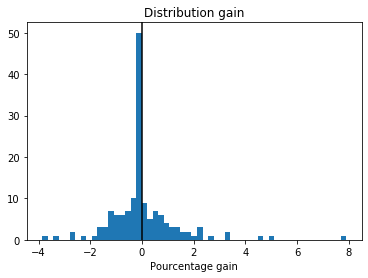

                                                           
-------------------- Growth -----------------------


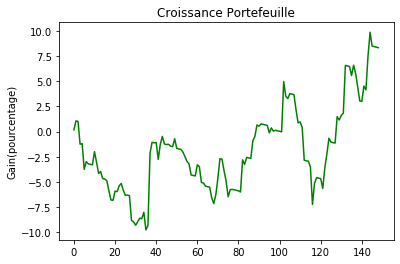

In [158]:
from earning import *

###### all variables strategie

database = pds.read_csv("actifs.csv", index_col="Unnamed: 0", parse_dates=True).sort_index(ascending=True)
database = database[listcolumns].pct_change(1).dropna()

a = 1000
l = 1150


X_train = database.iloc[0:a-1,:].values
X_visu = database.iloc[a:l-1,:].values

y_train = database[["Close GOLD"]].iloc[1:a,:].values
y_visu = database[['Close GOLD']].iloc[a+1:l,:].values

from sklearn.linear_model import LinearRegression
rl = LinearRegression()
rl.fit(X_train, y_train)
y_pred = rl.predict(X_visu)
earning(y_pred, y_visu, leverage=1)

------------------ Initialisation -----------------------
Rising threshold: 0.0
Lower threshold: 0.0
Spread: 0.0005
Leverage: 1
                                                           
---------------------- Metrics ----------------------------
Accuracy 37.58 %
Pourcentage of earnings: 11.38 %
Poucentage composed: 10.55 %
Ratio earning/trade: 0.08 %
Standard deviation of earning: 1.35 %
Sharpe ratio: 0.056556
Sortino ratio: 0.094256
                                                           
-------------------- Other Data -----------------------
Sum rise earning: -7.86 %
Sum drop earning: 19.24 %
Max rise earning: 4.99 %
Min rise earning: -4.77 %
Max drop earning: 7.91 %
Min drop earning: -3.5 %
                                                           
-------------------- Distribution -----------------------


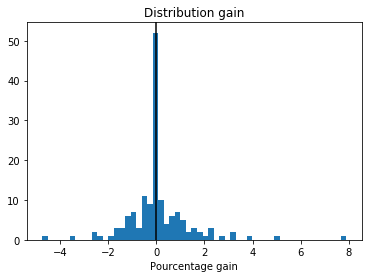

                                                           
-------------------- Growth -----------------------


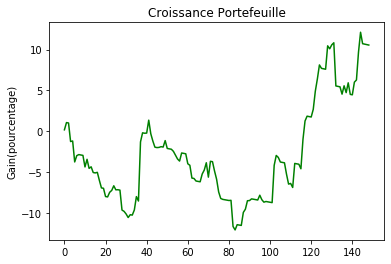

In [159]:
###### Best variables strategie

database = pds.read_csv("actifs.csv", index_col="Unnamed: 0", parse_dates=True).sort_index(ascending=True)
database = database[["Close GOLD"]+columns].pct_change(1).dropna()

a = 1000
l = 1150


X_train = database.iloc[0:a-1,:].values
X_visu = database.iloc[a:l-1,:].values

y_train = database[["Close GOLD"]].iloc[1:a,:].values
y_visu = database[['Close GOLD']].iloc[a+1:l,:].values

from sklearn.linear_model import LinearRegression
rl = LinearRegression()
rl.fit(X_train, y_train)
y_pred = rl.predict(X_visu)
earning(y_pred, y_visu, leverage=1)

###### Standardisation

In [162]:
##### Importation de la fonction de standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scdata = sc.fit_transform(dataset[["Close CAC40"]+columns])

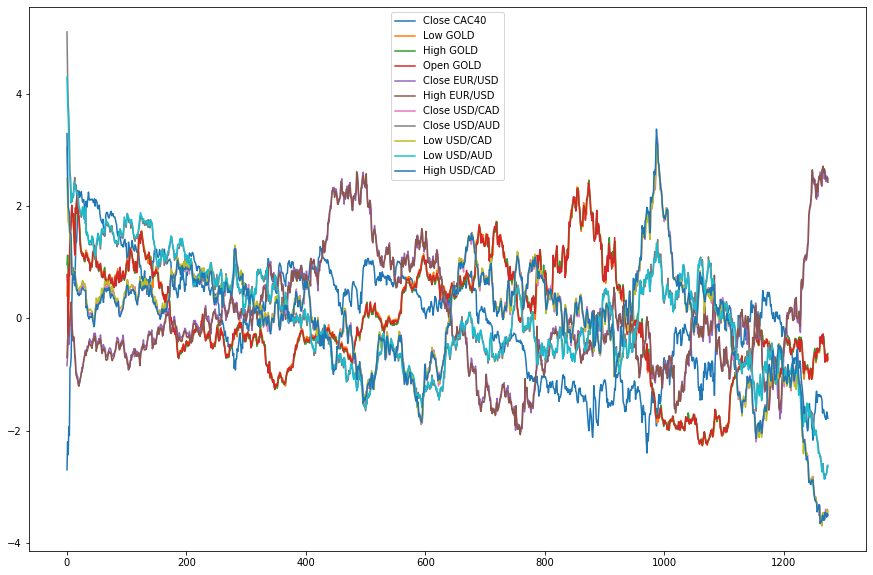

In [164]:
pds.DataFrame(scdata, columns=["Close CAC40"]+columns).plot(figsize=(15,10))

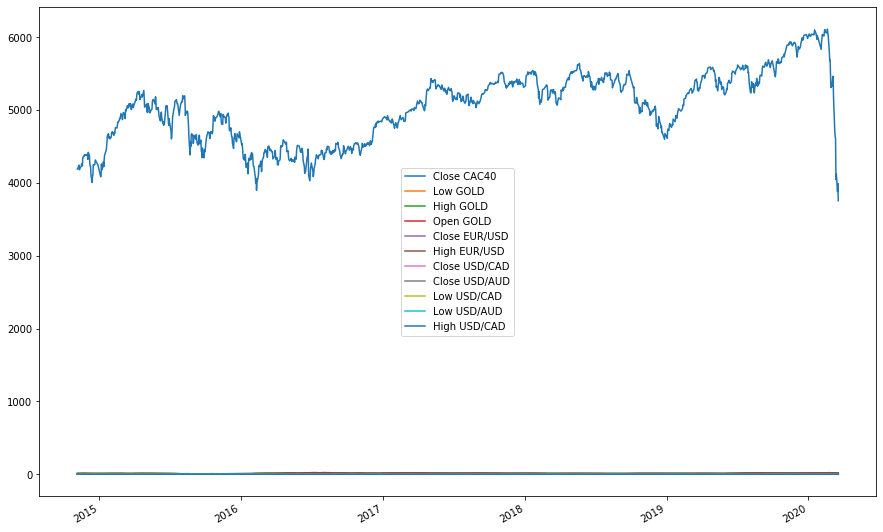

In [165]:
dataset[["Close CAC40"]+columns].plot(figsize=(15,10))